# Project Overview 
In the lab phase of our course, "Introduction to Artificial Intelligence," I chose to focus on a health and sleep dataset. Throughout this project, I undertook the task of preprocessing the data, visualizing it to select the best features for the modeling phase, and subsequently training a model to predict sleep disorders based on user-input data. The model aims to identify whether the person corresponding to the input data has a sleep disorder, specifically detecting sleep apnea, insomnia, or the absence of a sleep disorder.
I opted to work on this project due to its intriguing nature and its potential applicability in the market. Sleep-related issues are prevalent, and an AI-based solution could offer valuable insights and assistance in identifying and managing sleep disorders.
It's crucial to note that the dataset used in this project was created by someone else. Consequently, there may be inaccuracies or errors in the data.
Let's delve into the details of each step in our workflow.

# Library's Importation

In [241]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Data Reading 

In [242]:
#Read and show the first 10 lines of our data set
df=pd.read_csv(r"C:\xampp\htdocs\lina\project\ds\vf\Sleep_health_and_lifestyle_dataset.csv", encoding="ISO-8859-1", sep=',')
print(df.head(10))

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60    

# Data Preprocessing

In [243]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [244]:
# Display descriptive statistics of the DataFrame's numerical columns
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [245]:
# Check for missing values in each column and sum them up
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [246]:
# Fill missing values in the 'Sleep Disorder' column with 'No disorder detected'
df['Sleep Disorder'].fillna('No disorder detected',inplace=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder detected
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder detected
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder detected
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [247]:
# Check for missing values after the filling
df.isnull().sum().sum()

0

In [248]:
# Count the occurrences of each unique value in the 'BMI Category'
print (df['BMI Category'].value_counts())

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


In [249]:
#Replacing wrong values
df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')
print (df['BMI Category'].value_counts())

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64


In [250]:
# Split the 'Blood Pressure' column into two separate columns: 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
# Drop the original 'Blood Pressure' column
df.drop(columns=['Blood Pressure'], inplace=True)

In [251]:
# Define a function to categorize blood pressure
def bp_category (s,d):
    # Define a function to categorize blood pressure
    s=int(s)
    d=int(d)
    # Categorize blood pressure based on defined ranges
    if (s<120) and (d<80):
        return 'Normal'
    if (s<129) and (d<80):
        return 'Elevated'
    if (s<130) or (d<89):
        return 'Hypertension Stage 1'
    if (s>=140) or (d>=90):
        return 'Hypertension Stage 2'
    return 'Need a Doctor'
# Apply the bp_category function to create a new column 'Blood Pressure Category'
df['Blood Pressure Category'] = df.apply(lambda row: bp_category(row['Systolic'], row['Diastolic']), axis=1)

In [252]:
#Drop irrelevent Data
df.drop(['Person ID'], axis=1, inplace=True)

In [253]:
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Blood Pressure Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorder detected,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No disorder detected,125,80,Hypertension Stage 1
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No disorder detected,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Hypertension Stage 2
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Hypertension Stage 2
7,Male,29,Doctor,7.8,7,75,6,Normal Weight,70,8000,No disorder detected,120,80,Hypertension Stage 1
8,Male,29,Doctor,7.8,7,75,6,Normal Weight,70,8000,No disorder detected,120,80,Hypertension Stage 1
9,Male,29,Doctor,7.8,7,75,6,Normal Weight,70,8000,No disorder detected,120,80,Hypertension Stage 1


In [254]:
# Count the occurrences of each unique value in the 'Occupation' column
print (df['Occupation'].value_counts())

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


In [255]:
# Create a copy of the original DataFrame
df1=df.copy()

# Function to replace 'Gender' values with numerical codes
def replace_gender(a):
    a['Gender']=a['Gender'].replace({'Female': 0, 'Male': 1})
    return a

# Function to replace 'Occupation' values with numerical codes
def replace_Occupation_values(a):
    occupation_mapping = {
        'Nurse': 0,
        'Doctor': 1,
        'Teacher': 2,
        'Scientist':3,
        'Engineer': 4,
        'Software Engineer': 4,
        'Lawyer': 5,
        'Accountant': 6,
        'Salesperson': 7,
        'Sales Representative': 7,
        'Manager': 8,
        'Other': 9
    }
    a['Occupation'] = a['Occupation'].replace(occupation_mapping)
    return a

# Function to replace 'BMI Category' values with numerical codes
def replace_bmi_category_values(a):
   a['BMI Category']=a['BMI Category'].replace({
       'Normal Weight': 0,
       'Obese' : 1,
       'Overweight': 2,
   })
   return a

# Function to replace 'Blood Pressure Category' values with numerical codes
def replace_BloodPressureCategory_values(a):
   a['Blood Pressure Category']=a['Blood Pressure Category'].replace({
       'Normal': 0,
       'Elevated': 1,
       'Hypertension Stage 1': 2,
       'Hypertension Stage 2': 3,
       'Need a Doctor': 4,
   })
   return a

# Function to replace 'Sleep Disorder' values with numerical codes
def replace_SleepDisorder_category_values(a):
   a['Sleep Disorder']=a['Sleep Disorder'].replace({
       'No disorder detected': 0,
       'Sleep Apnea': 1,
       'Insomnia': 2,
   })
   return a

# Apply each of the functions to replace categorical values with numerical codes
df1=replace_gender(df1)
df1=replace_Occupation_values(df1)
df1=replace_bmi_category_values(df1)
df1=replace_BloodPressureCategory_values(df1)
df1=replace_SleepDisorder_category_values(df1)

# Drop 'Systolic' and 'Diastolic' columns
df1=df1.drop(['Systolic'], axis=1)
df1=df1.drop(['Diastolic'], axis=1)

# Display the DataFrame after the modifications
df1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
0,1,27,4,6.1,6,42,6,2,77,4200,0,2
1,1,28,1,6.2,6,60,8,0,75,10000,0,2
2,1,28,1,6.2,6,60,8,0,75,10000,0,2
3,1,28,7,5.9,4,30,8,1,85,3000,1,3
4,1,28,7,5.9,4,30,8,1,85,3000,1,3


In [256]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Blood Pressure Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorder detected,126,83,Hypertension Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No disorder detected,125,80,Hypertension Stage 1
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,No disorder detected,125,80,Hypertension Stage 1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2


# Data Visiualisation

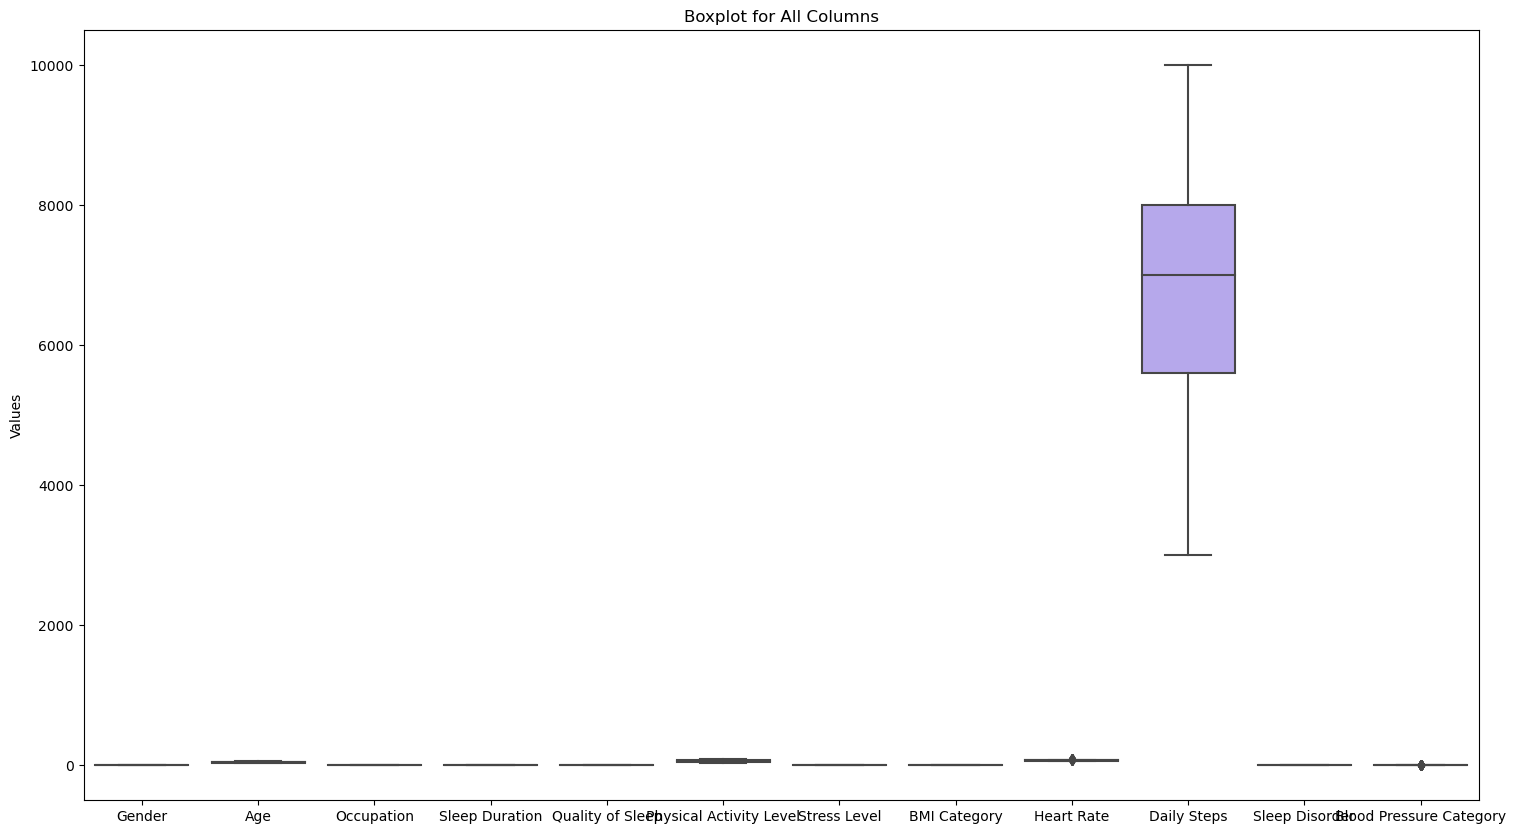

In [257]:
#outliers detection
plt.figure(figsize=(18, 10))
sns.boxplot(df1)
plt.title("Boxplot for All Columns")
plt.ylabel("Values")
plt.show()

In [258]:
#Function to generates a stacked column chart
def stacked_column_chart(dataframe, x_column, y_column, title):
    
    grouped_df = dataframe.groupby([x_column, y_column]).size().reset_index(name='Count')
    pivot_df = grouped_df.pivot_table(index=x_column, columns=y_column, values='Count', fill_value=0)
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=y_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [259]:
#Function to generates a pie chart
def pie_chart(dataframe,name_column,title):
    
    column_counts = dataframe[name_column].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff', '#cdb79e', '#dedede']
    plt.figure(figsize=(8, 8))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(title)
    plt.show()

In [260]:
#Function to generates a line chart
def line_chart(dataframe,x,y,title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=x, y=y, data=dataframe, marker='o')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [261]:
#Function to generates a bubble chart
def bubble_chart(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, color='purple', size=1 , data=df, sizes=(20, 200), legend="full", alpha=0.7)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

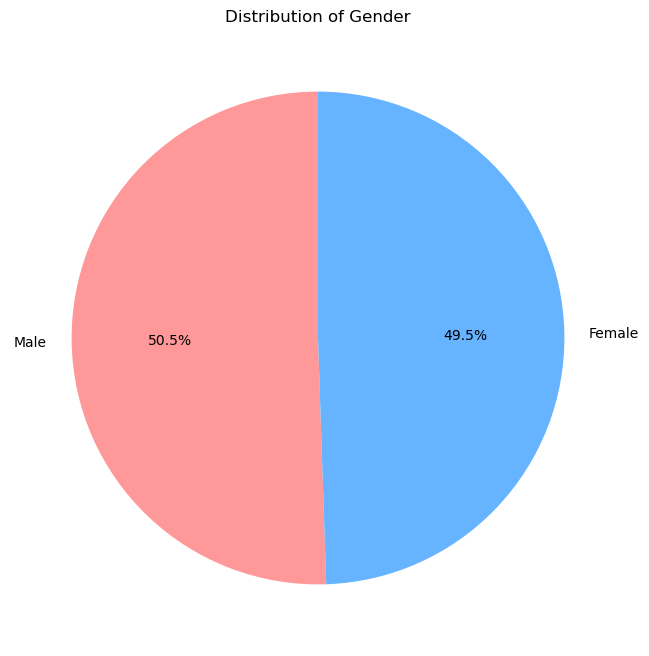

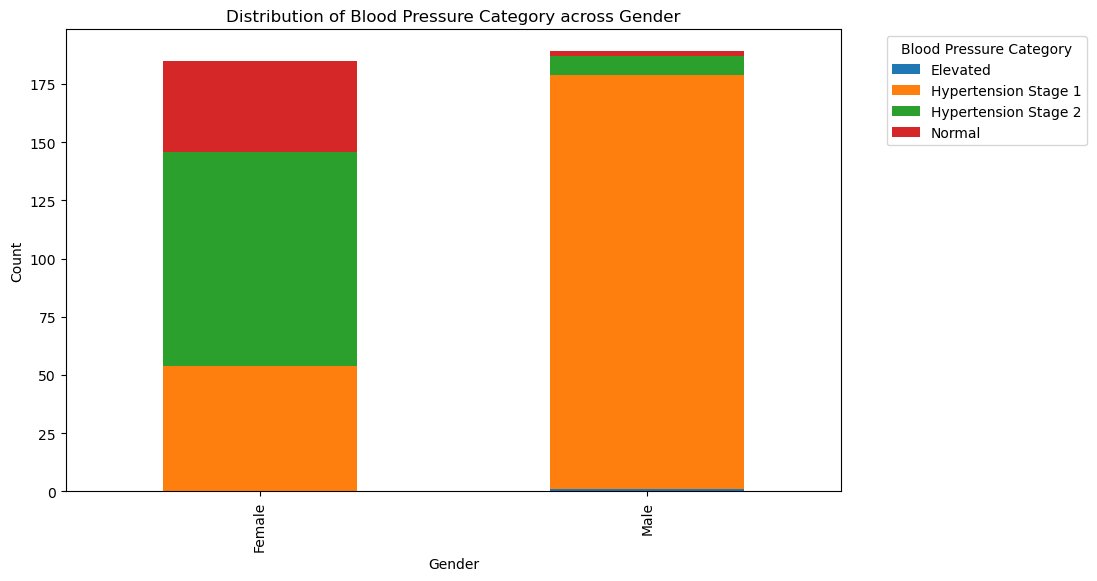

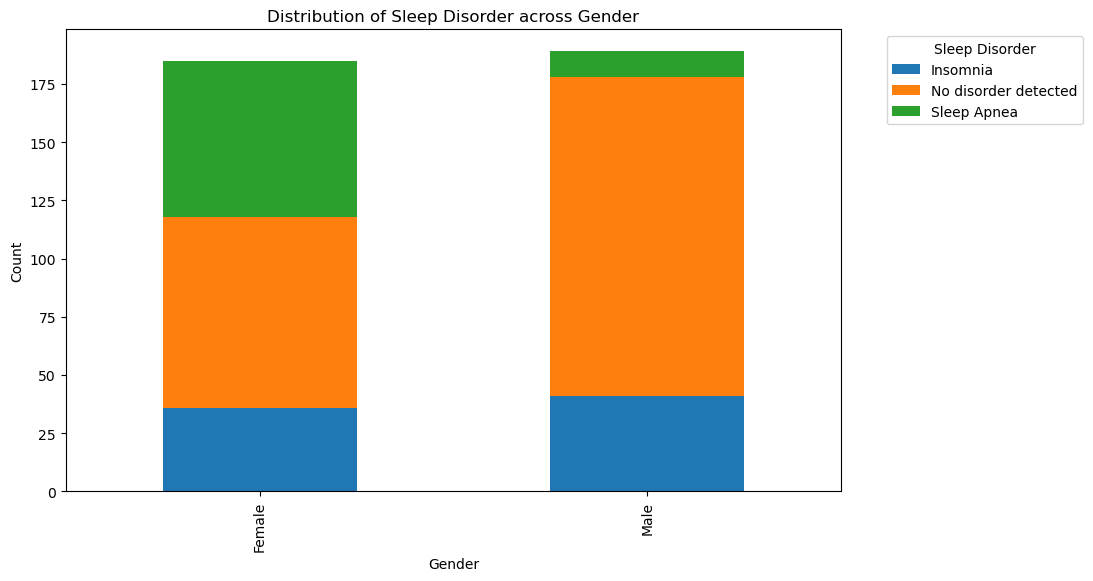

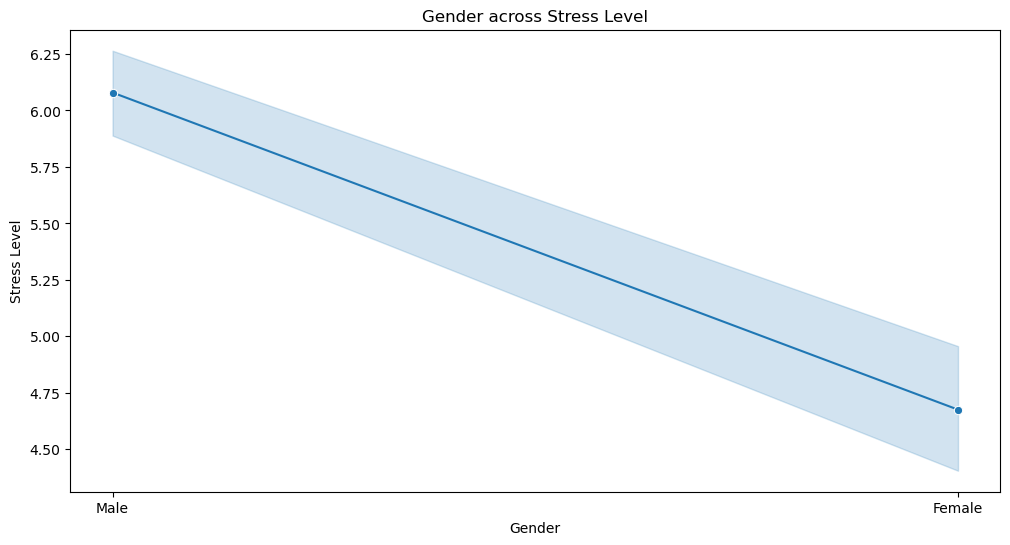

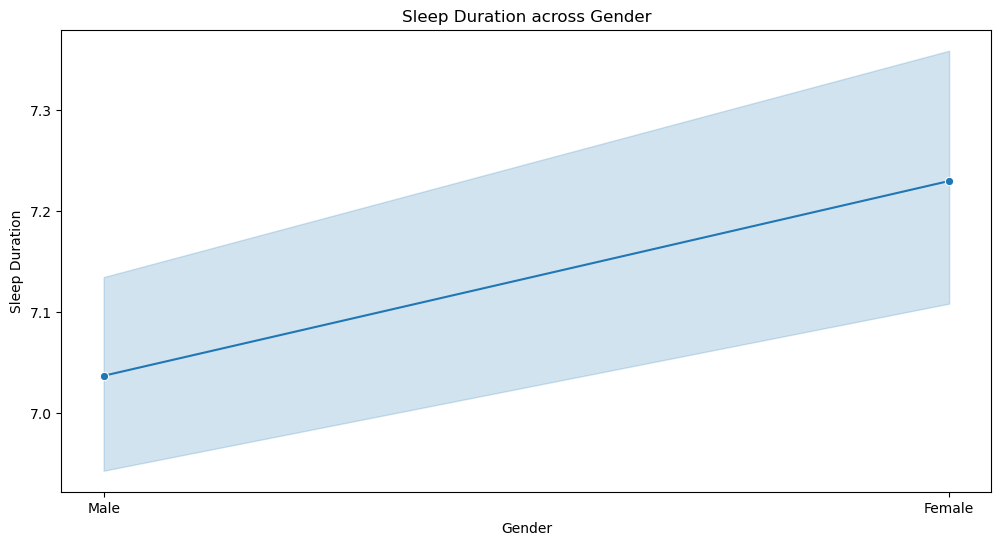

In [262]:
# Diverse visualizations to explore the relationship between gender and other columns
pie_chart(df,'Gender','Distribution of Gender')
stacked_column_chart(df, 'Gender', 'Blood Pressure Category', 'Distribution of Blood Pressure Category across Gender')
stacked_column_chart(df, 'Gender', 'Sleep Disorder', 'Distribution of Sleep Disorder across Gender')
line_chart(df,'Gender', 'Stress Level','Gender across Stress Level')
line_chart(df,'Gender', 'Sleep Duration','Sleep Duration across Gender')

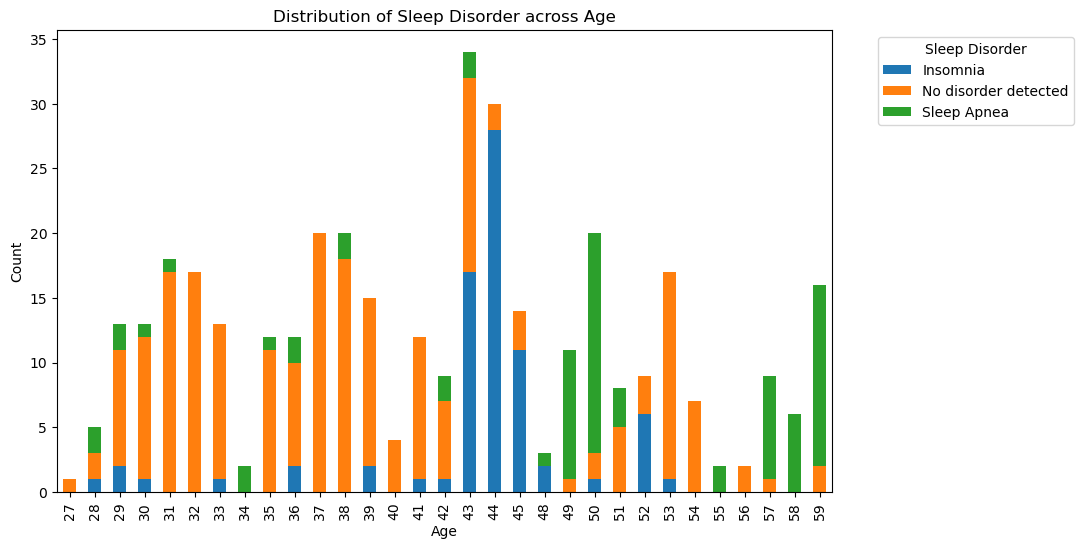

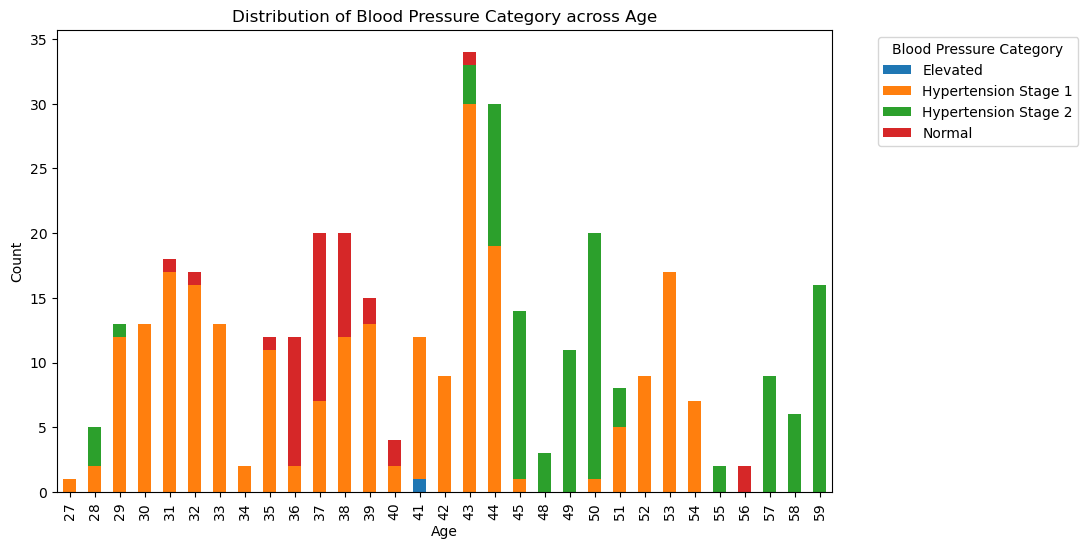

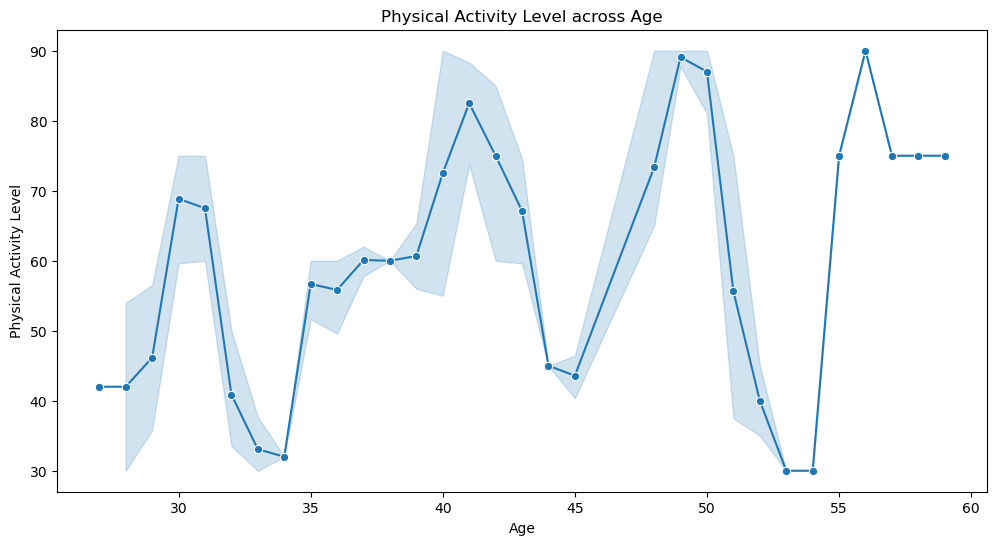

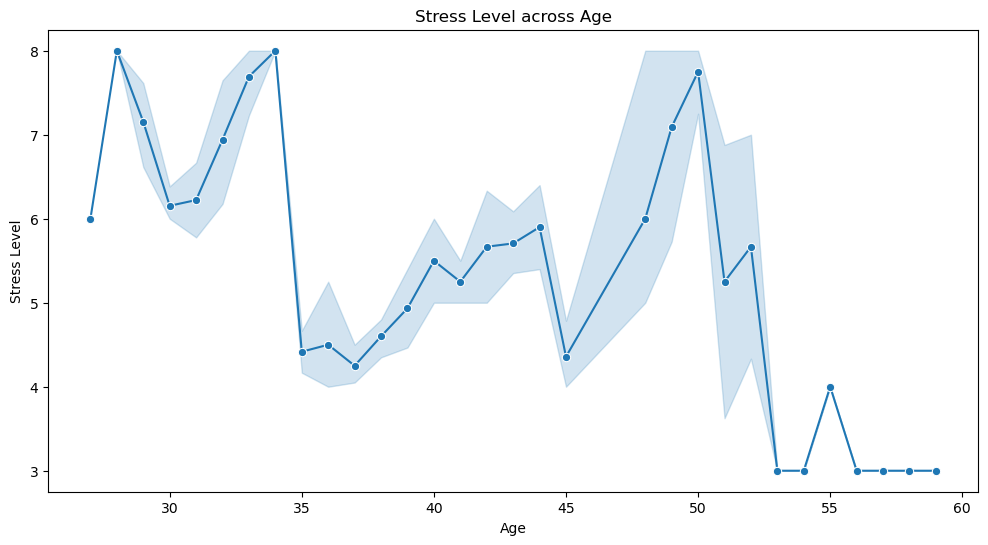

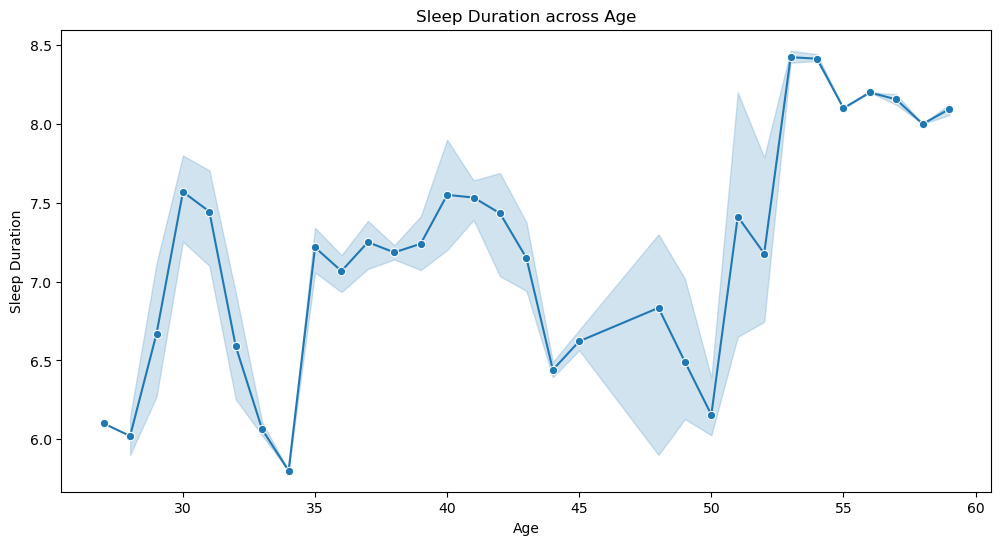

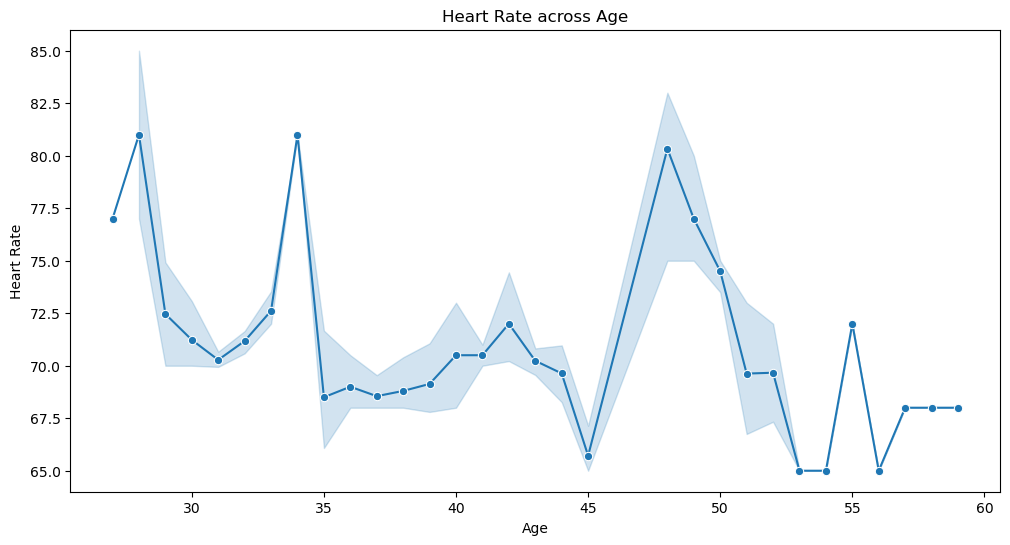

In [263]:
# Diverse visualizations to explore the relationship between age and other columns
stacked_column_chart(df, 'Age', 'Sleep Disorder', 'Distribution of Sleep Disorder across Age')
stacked_column_chart(df, 'Age', 'Blood Pressure Category', 'Distribution of Blood Pressure Category across Age')
line_chart(df,'Age', 'Physical Activity Level','Physical Activity Level across Age')
line_chart(df,'Age', 'Stress Level','Stress Level across Age')
line_chart(df,'Age', 'Sleep Duration','Sleep Duration across Age')
line_chart(df,'Age', 'Heart Rate','Heart Rate across Age')

<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

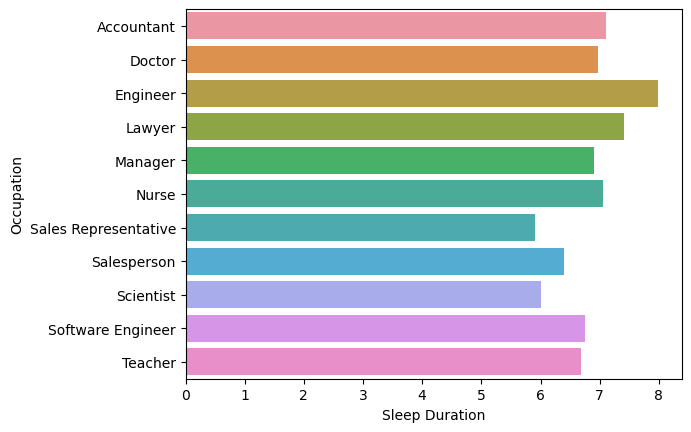

In [264]:
# Calculate the average sleep duration for each occupation
average_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
# Create a bar plot
sns.barplot(x='Sleep Duration', y='Occupation', data=average_sleep_by_occupation)

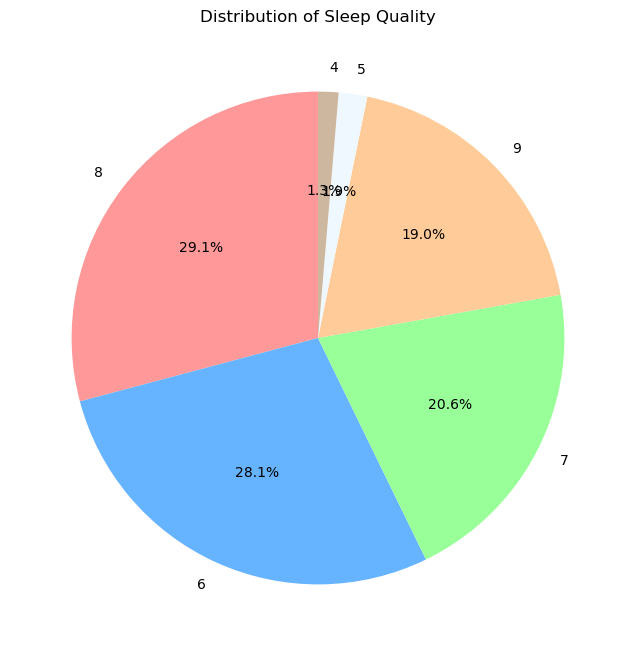

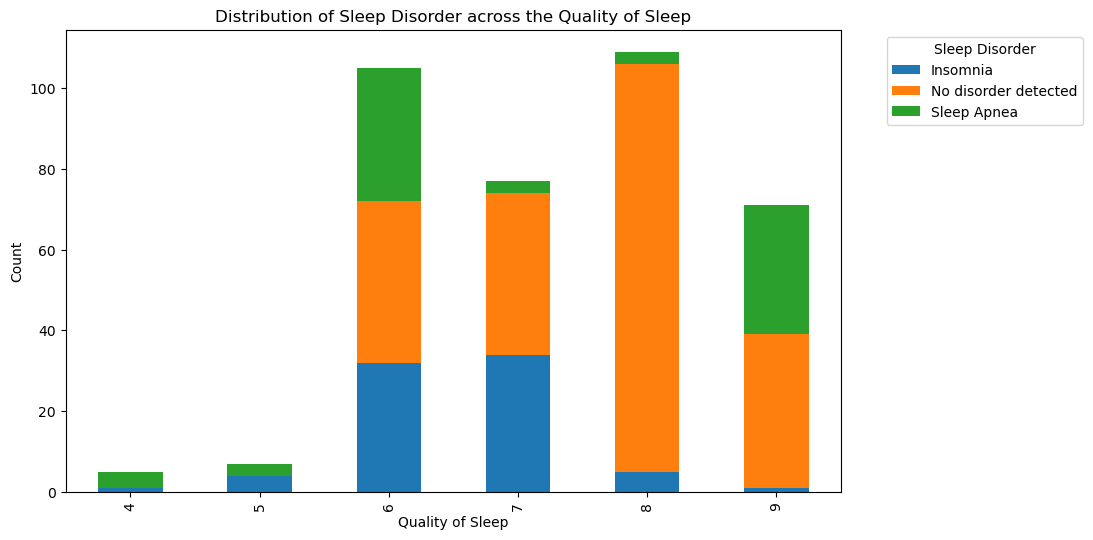

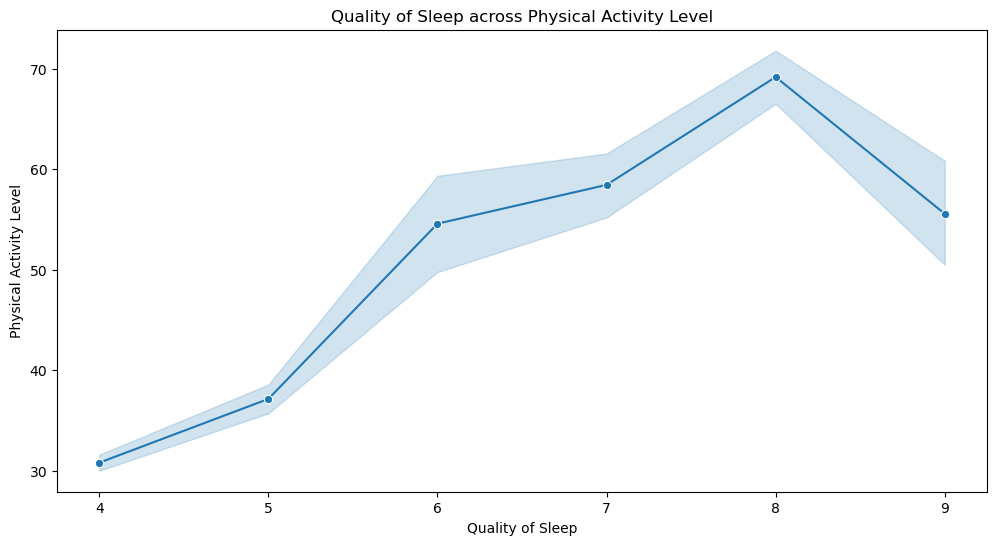

In [265]:
# Diverse visualizations to explore the relationship between quality of sleep and other columns
pie_chart(df,'Quality of Sleep','Distribution of Sleep Quality')
stacked_column_chart(df, 'Quality of Sleep', 'Sleep Disorder', 'Distribution of Sleep Disorder across the Quality of Sleep')
line_chart(df,'Quality of Sleep', 'Physical Activity Level','Quality of Sleep across Physical Activity Level')

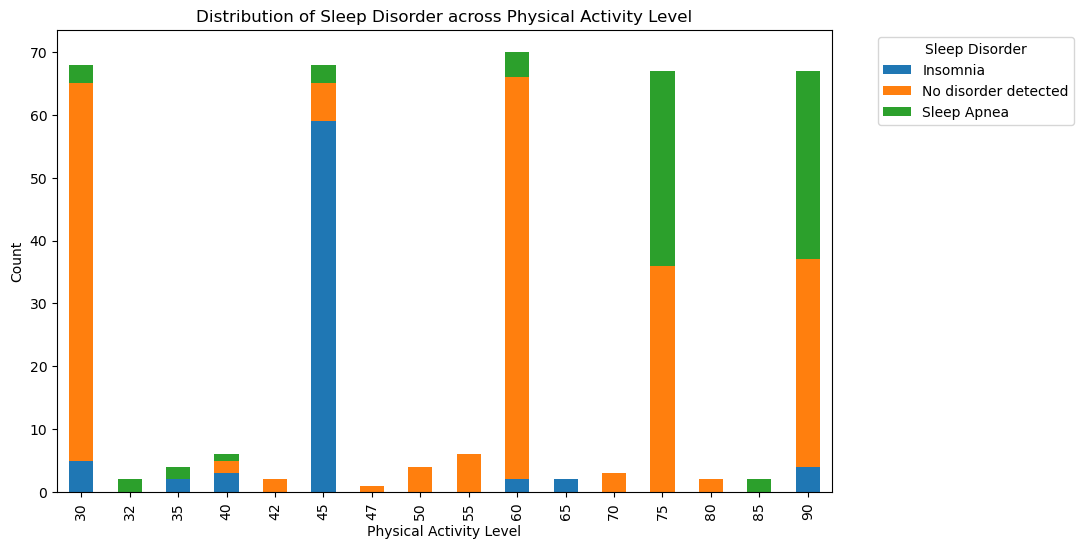

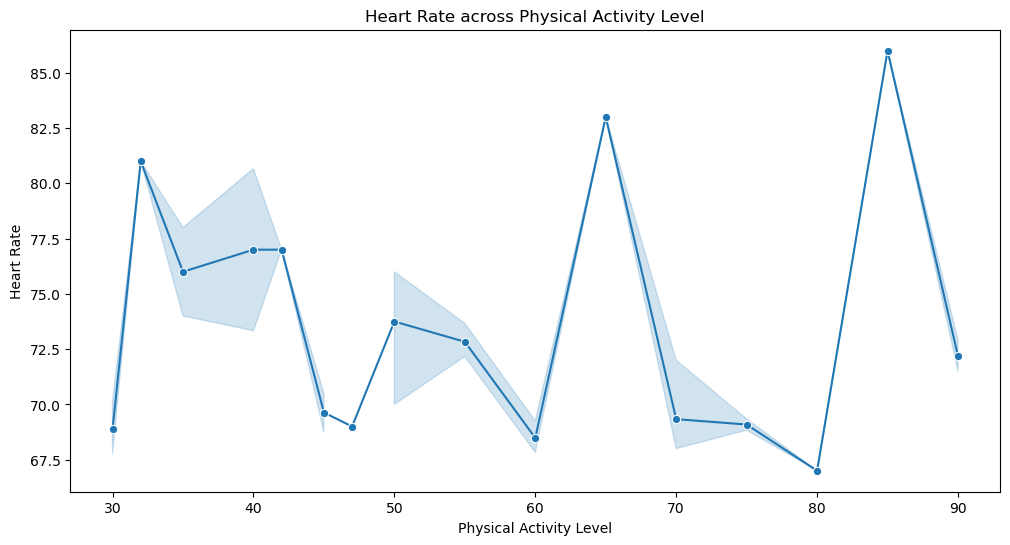

In [266]:
# Physical Activity Level
stacked_column_chart(df, 'Physical Activity Level', 'Sleep Disorder', 'Distribution of Sleep Disorder across Physical Activity Level')
line_chart(df,'Physical Activity Level', 'Heart Rate','Heart Rate across Physical Activity Level')

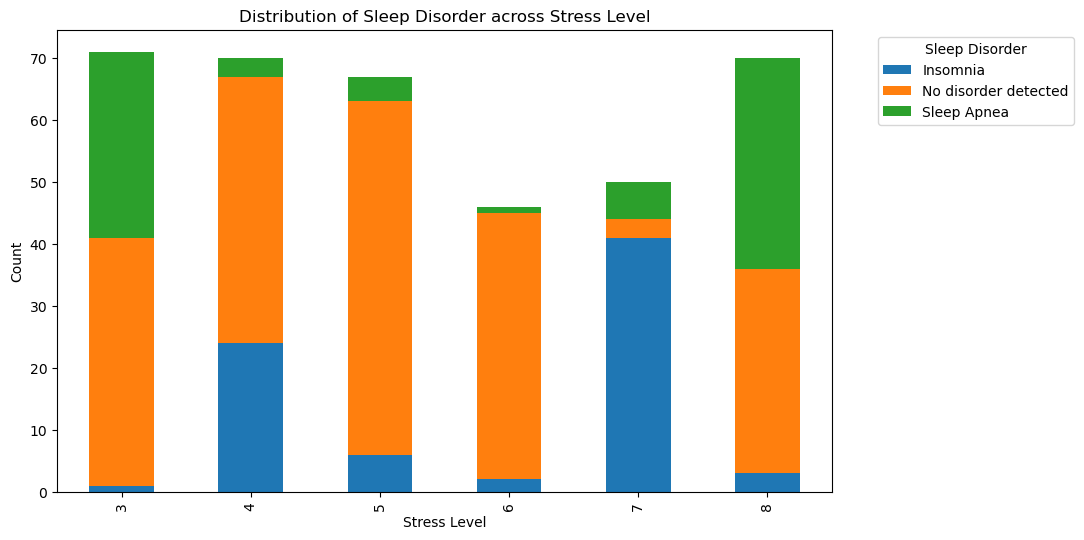

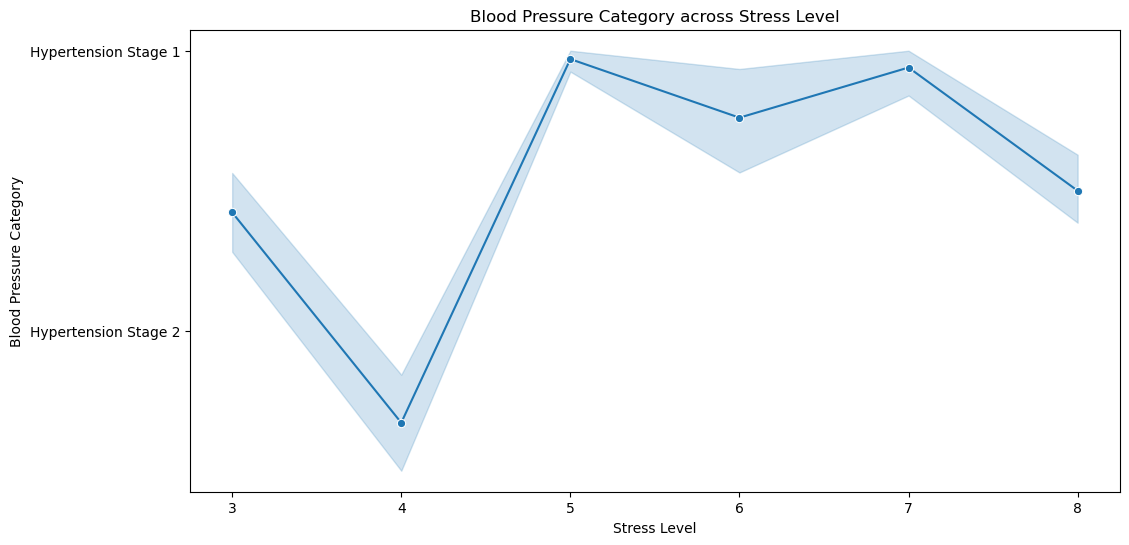

In [267]:
#Stress Level
stacked_column_chart(df, 'Stress Level', 'Sleep Disorder', 'Distribution of Sleep Disorder across Stress Level')
line_chart(df,'Stress Level', 'Blood Pressure Category','Blood Pressure Category across Stress Level')

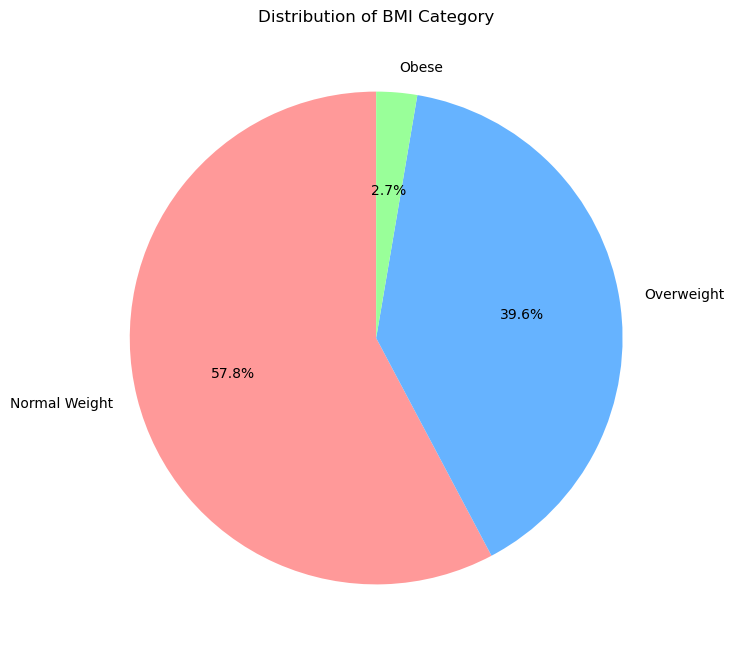

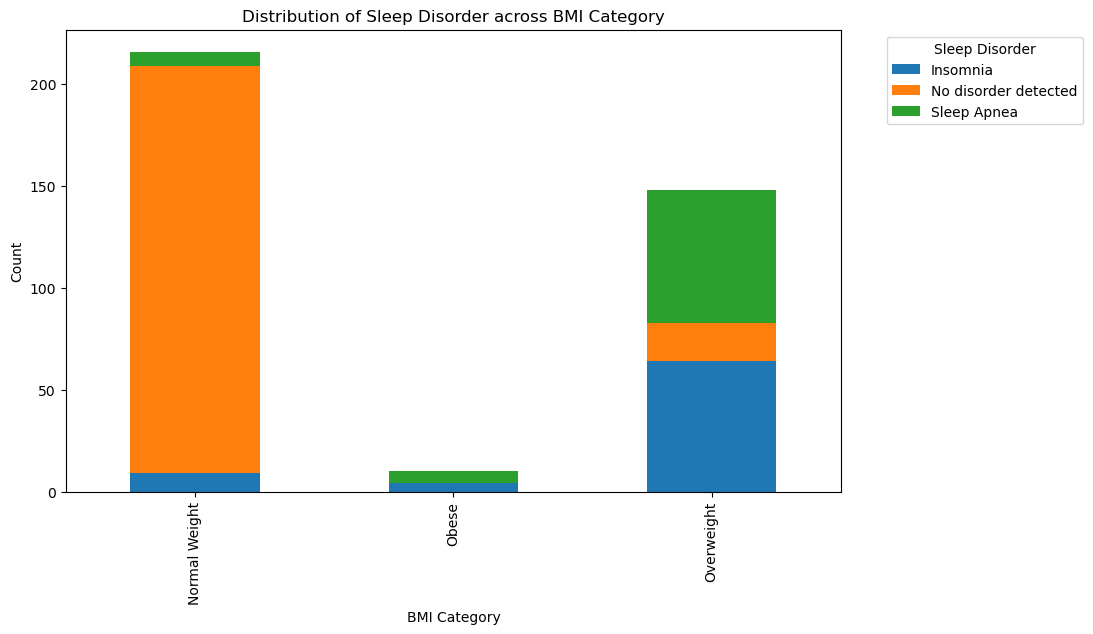

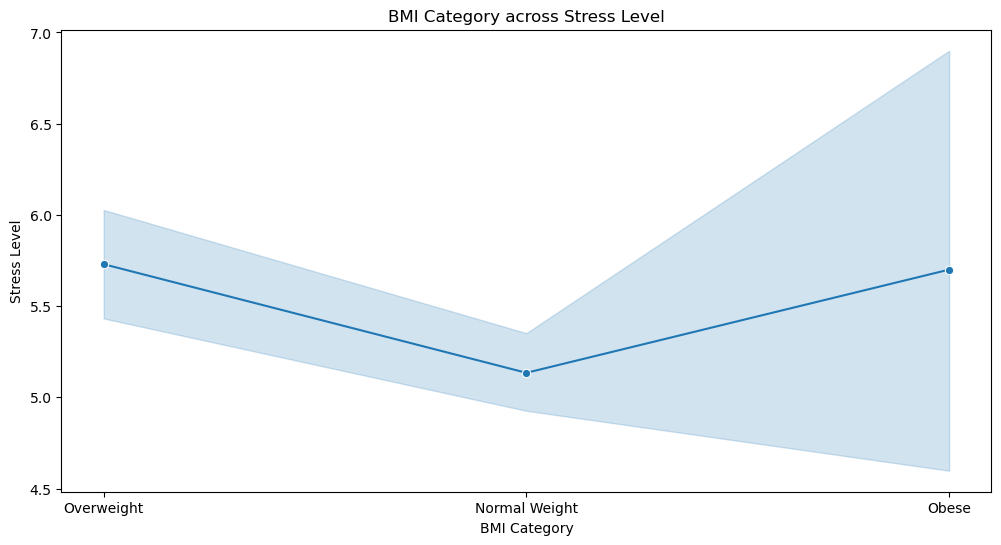

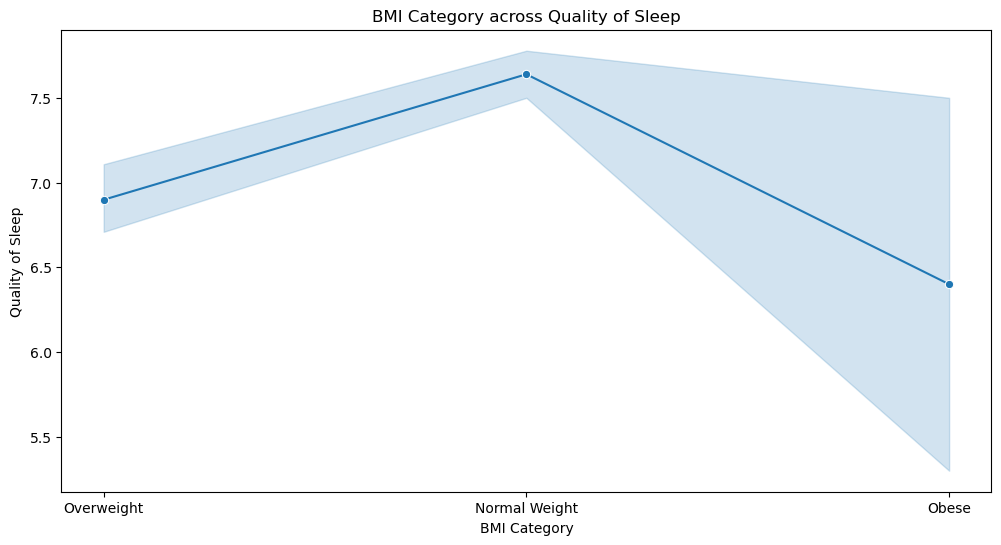

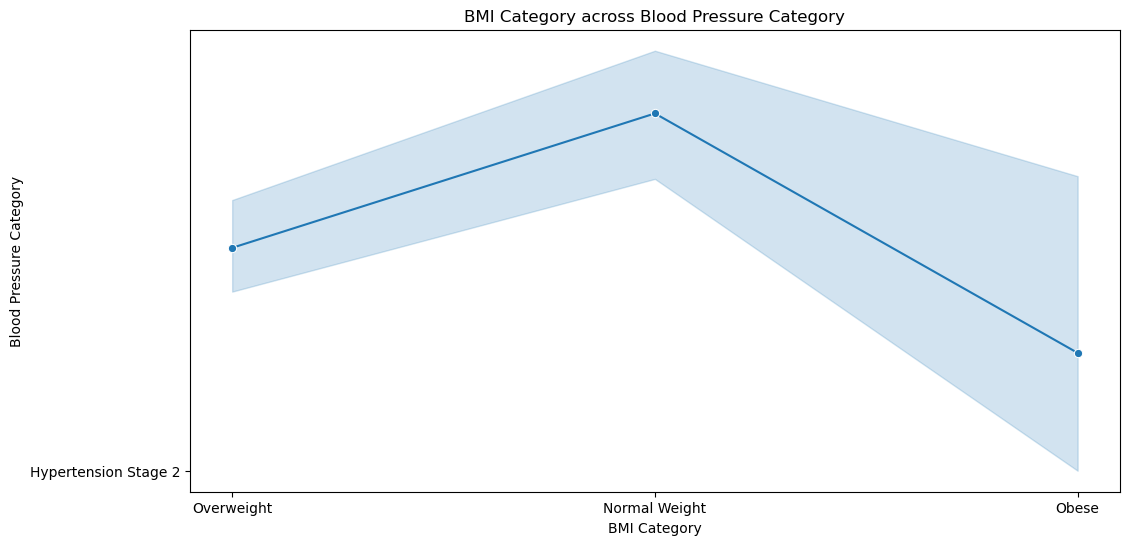

In [268]:
# Diverse visualizations to explore the relationship between BMI category and other columns
pie_chart(df,'BMI Category','Distribution of BMI Category')
stacked_column_chart(df, 'BMI Category', 'Sleep Disorder', 'Distribution of Sleep Disorder across BMI Category')
line_chart(df,'BMI Category', 'Stress Level','BMI Category across Stress Level')
line_chart(df,'BMI Category', 'Quality of Sleep','BMI Category across Quality of Sleep')
line_chart(df,'BMI Category', 'Blood Pressure Category','BMI Category across Blood Pressure Category')

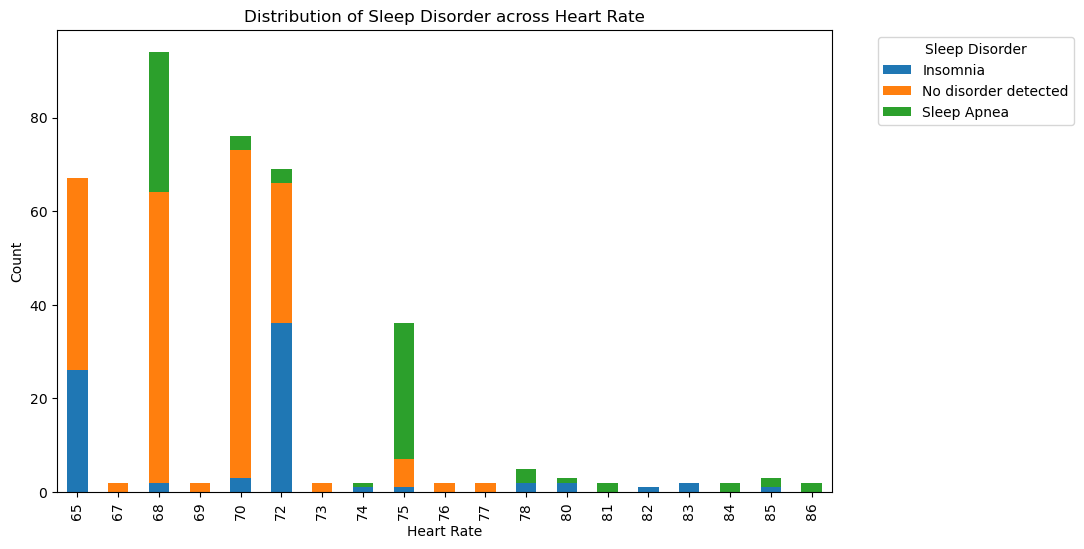

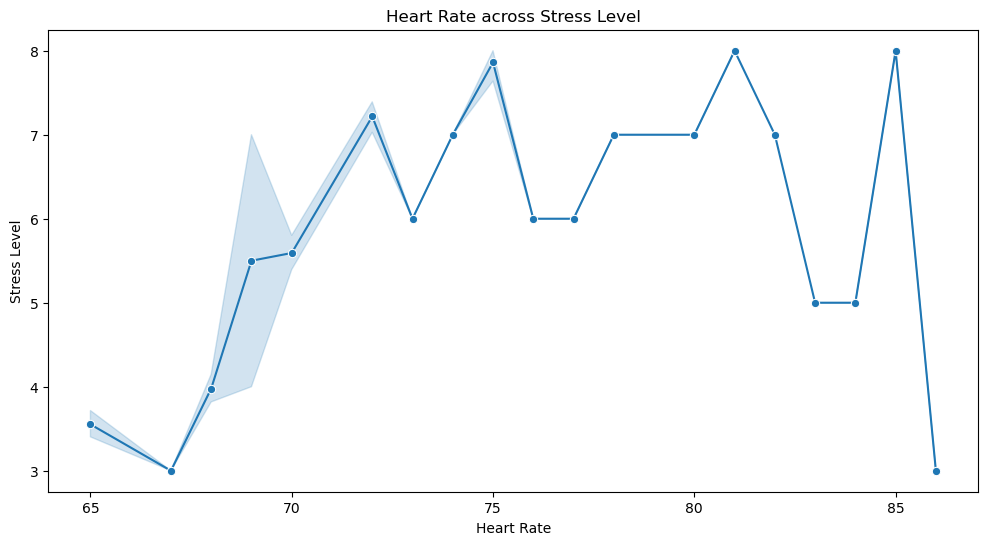

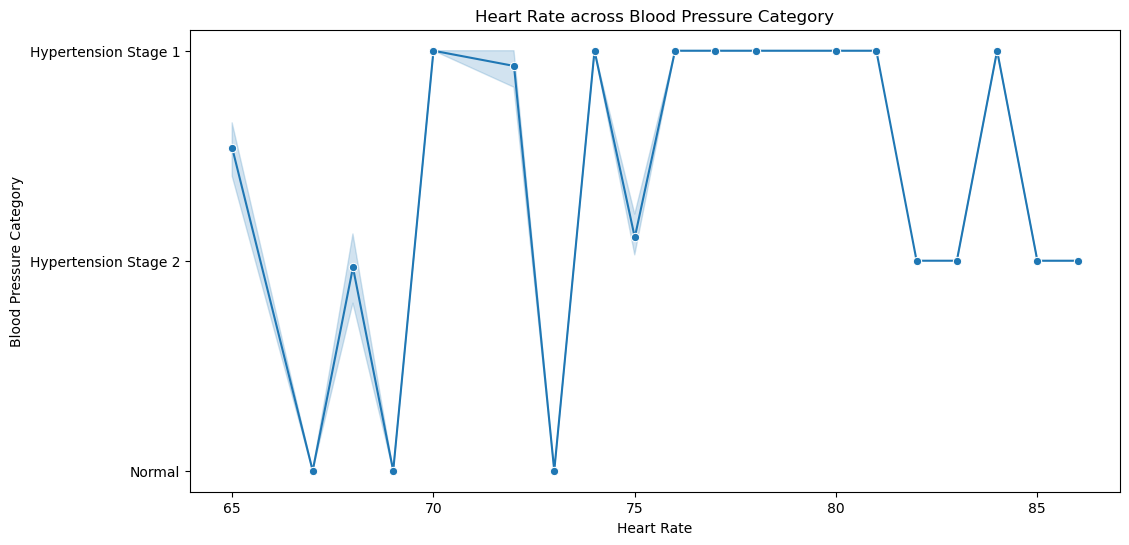

In [269]:
# Diverse visualizations to explore the relationship between the heart rate and other columns
stacked_column_chart(df, 'Heart Rate', 'Sleep Disorder', 'Distribution of Sleep Disorder across Heart Rate')
fig = px.scatter(df, x="Heart Rate", y="Physical Activity Level", log_x=True, size_max=60)
fig.show()
line_chart(df,'Heart Rate', 'Stress Level','Heart Rate across Stress Level')
line_chart(df,'Heart Rate', 'Blood Pressure Category','Heart Rate across Blood Pressure Category')

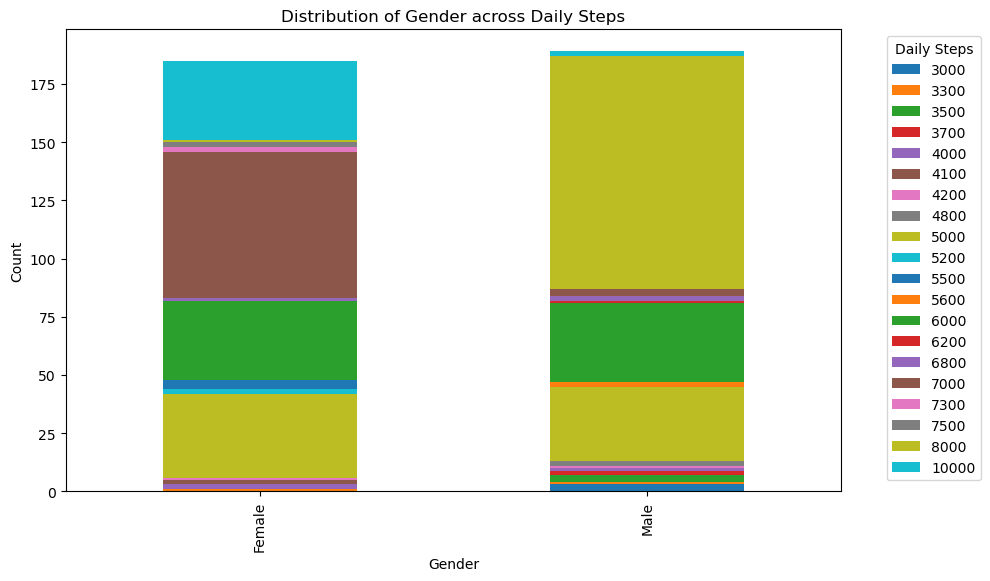

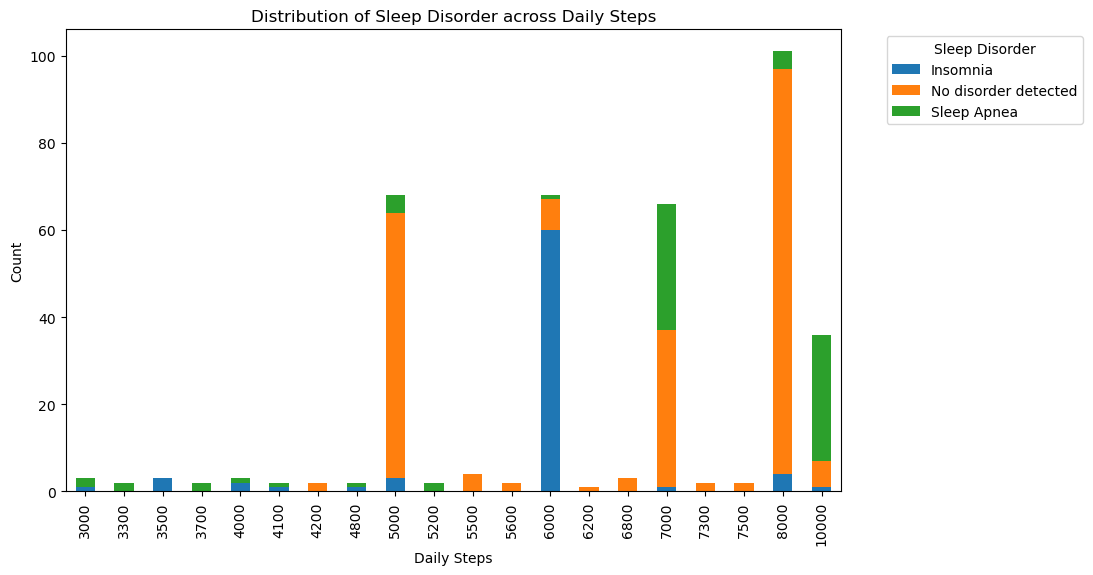

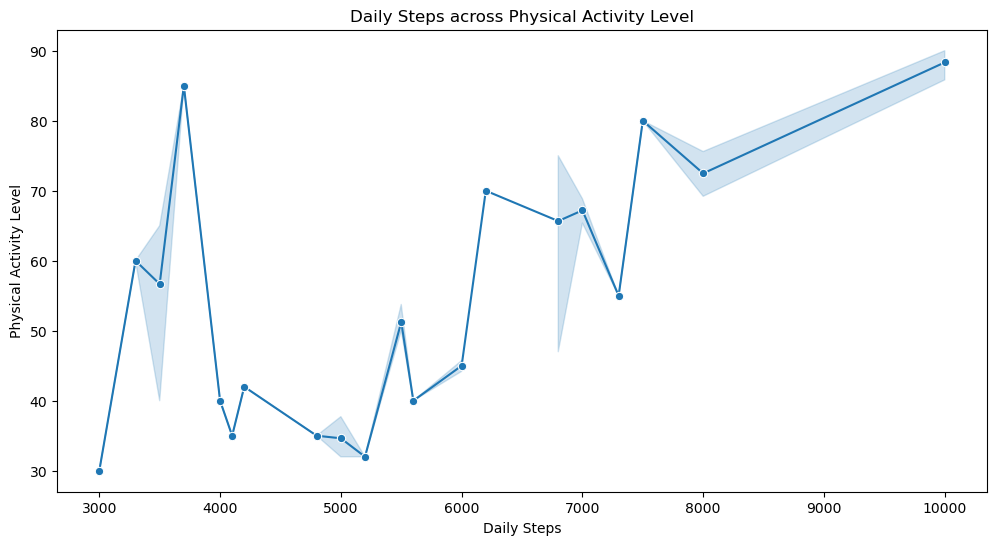

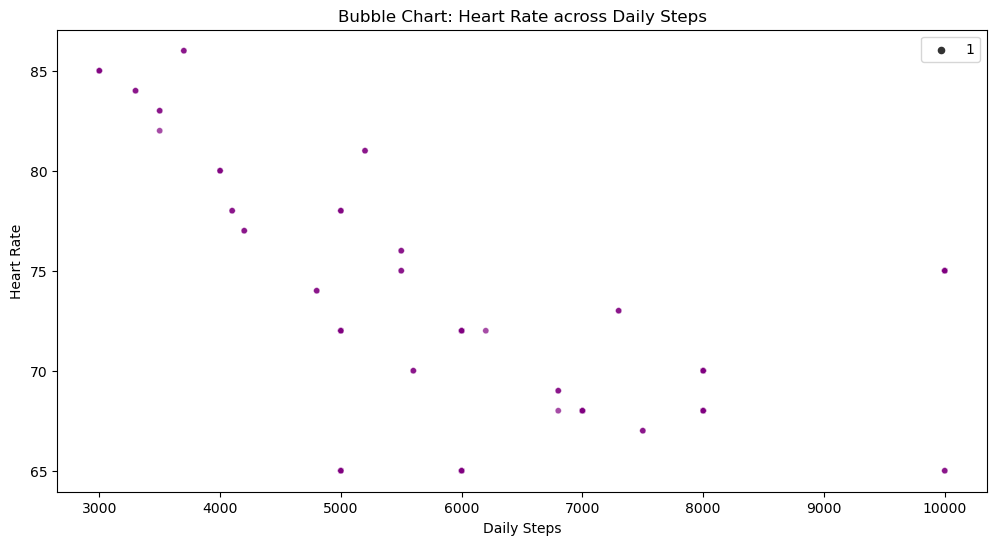

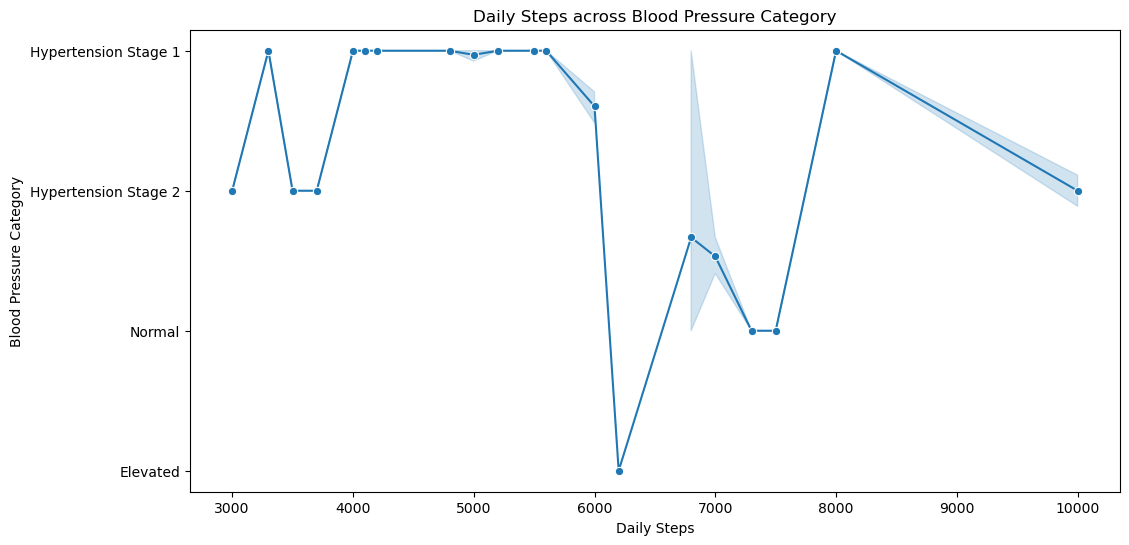

In [270]:
# Diverse visualizations to explore the relationship between Daily steps and other columns
stacked_column_chart(df, 'Gender', 'Daily Steps', 'Distribution of Gender across Daily Steps')
stacked_column_chart(df, 'Daily Steps', 'Sleep Disorder', 'Distribution of Sleep Disorder across Daily Steps')
line_chart(df,'Daily Steps', 'Physical Activity Level','Daily Steps across Physical Activity Level')
bubble_chart(df, 'Daily Steps', 'Heart Rate', 'Bubble Chart: Heart Rate across Daily Steps')
line_chart(df,'Daily Steps', 'Blood Pressure Category','Daily Steps across Blood Pressure Category')

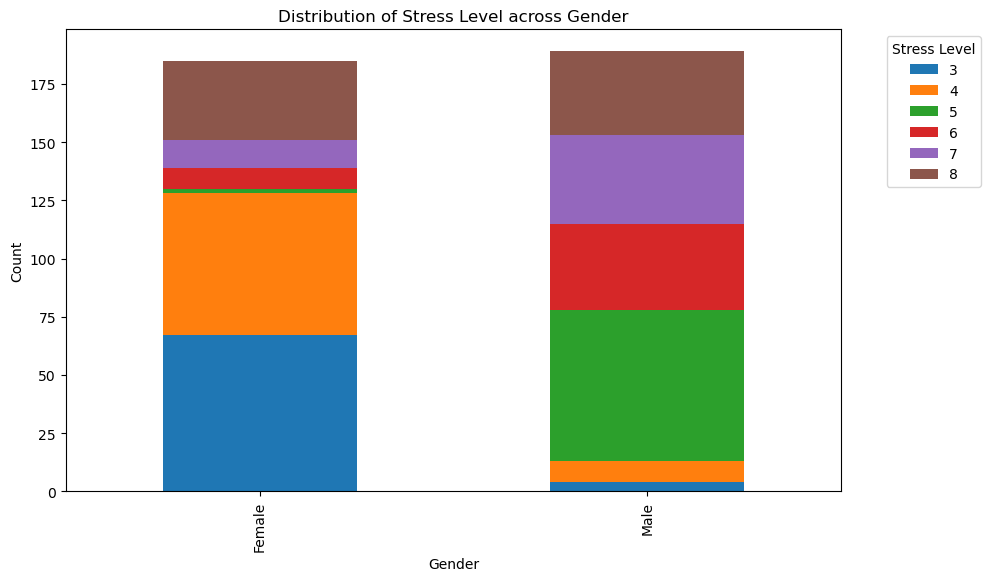

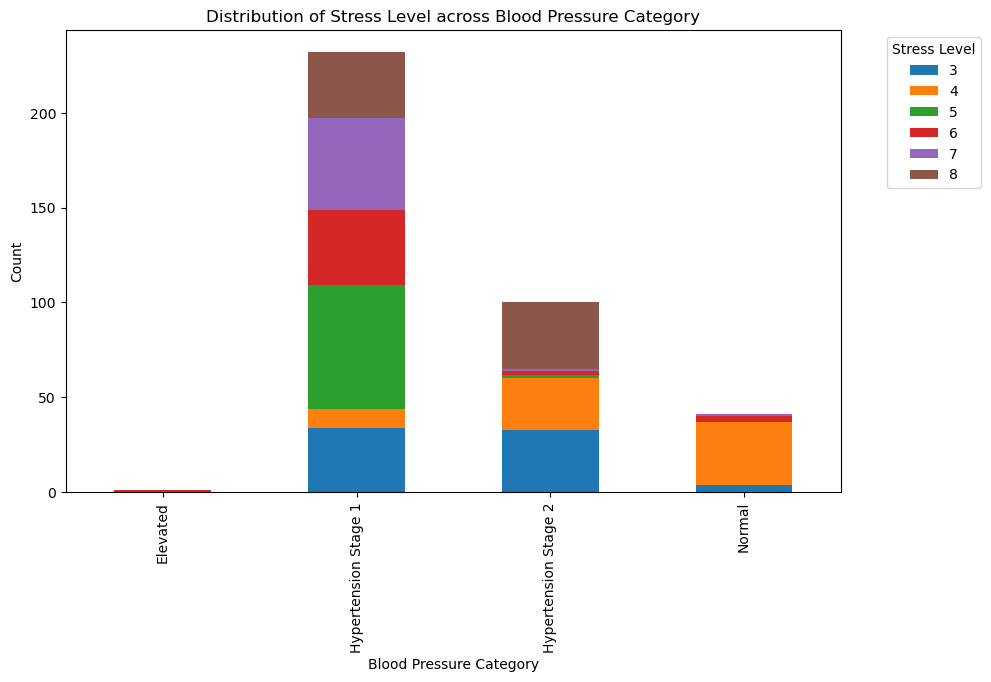

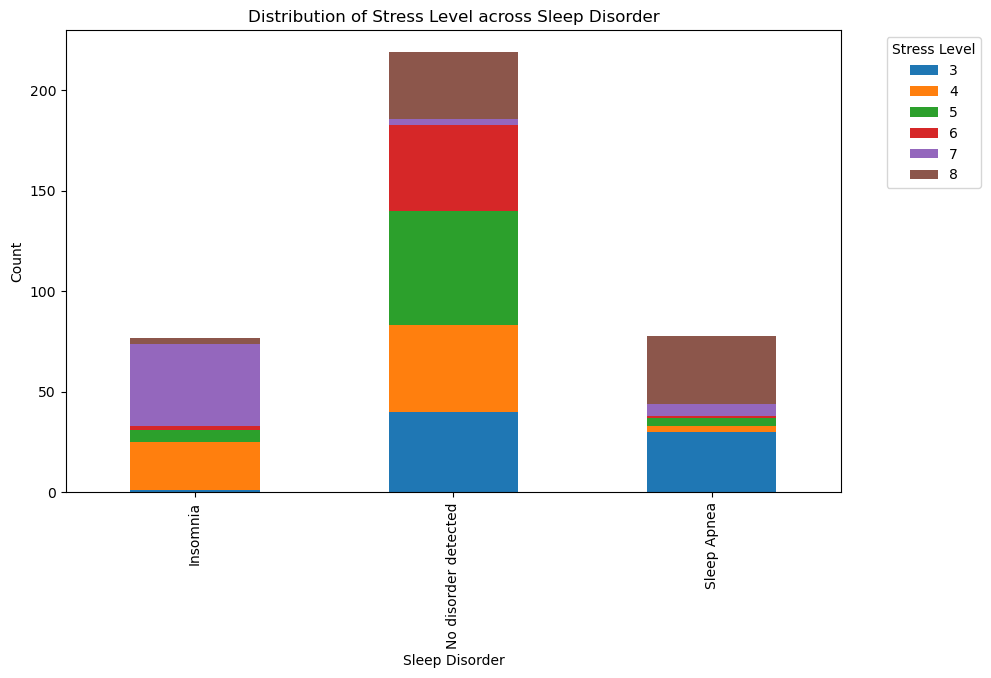

In [271]:
# Stacked column charts to explore the relationship between Stress Level and other columns
stacked_column_chart(df, 'Gender', 'Stress Level', 'Distribution of Stress Level across Gender')
stacked_column_chart(df, 'Blood Pressure Category', 'Stress Level', 'Distribution of Stress Level across Blood Pressure Category')
stacked_column_chart(df, 'Sleep Disorder', 'Stress Level', 'Distribution of Stress Level across Sleep Disorder')

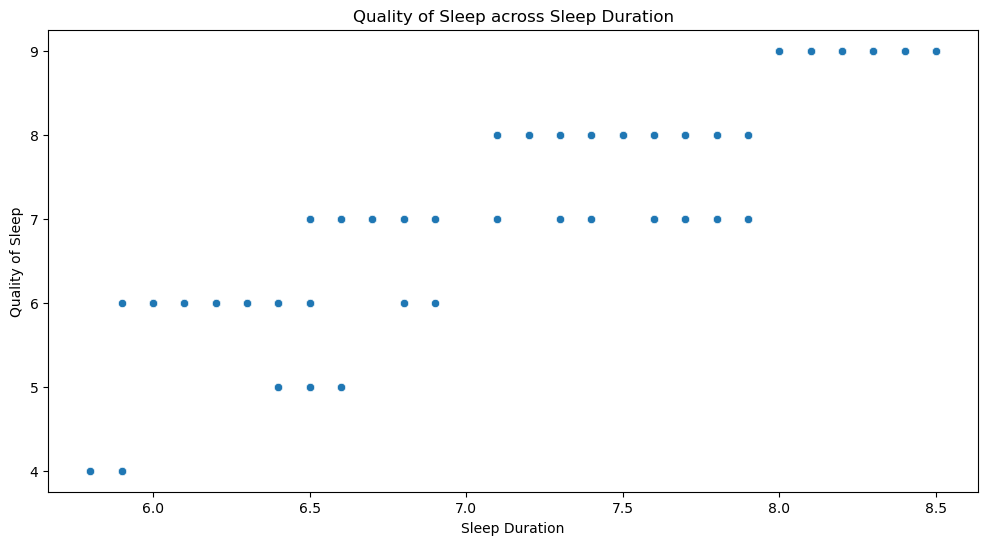

In [272]:
#Scatter plot to visualise the relationship between sleep dur and quality

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title('Quality of Sleep across Sleep Duration')
plt.show()

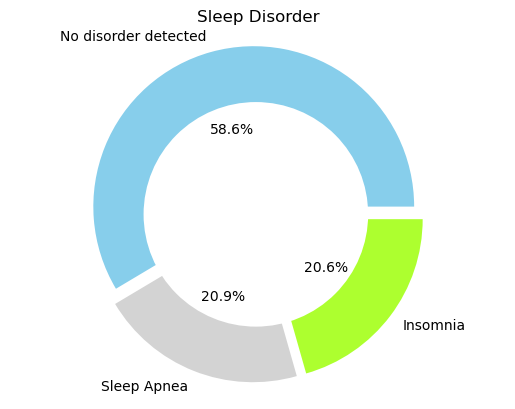

In [273]:
#Sleep Disorder
sizes = df['Sleep Disorder'].value_counts()
labels = sizes.index
colors = ['skyblue', 'lightgrey','#ADFF2F']  
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.50, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Sleep Disorder')
plt.axis('equal') 
plt.show()

In [274]:
df1.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.032086,7.132086,7.312834,59.171123,5.385027,0.818182,70.165775,6816.844920,0.620321,2.045455
std,0.500641,8.673133,2.393924,0.795657,1.196956,20.830804,1.774526,0.970940,4.135676,1617.915679,0.805620,0.841656
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,2.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000,2.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,3.000000
max,1.000000,59.000000,8.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000,2.000000,3.000000


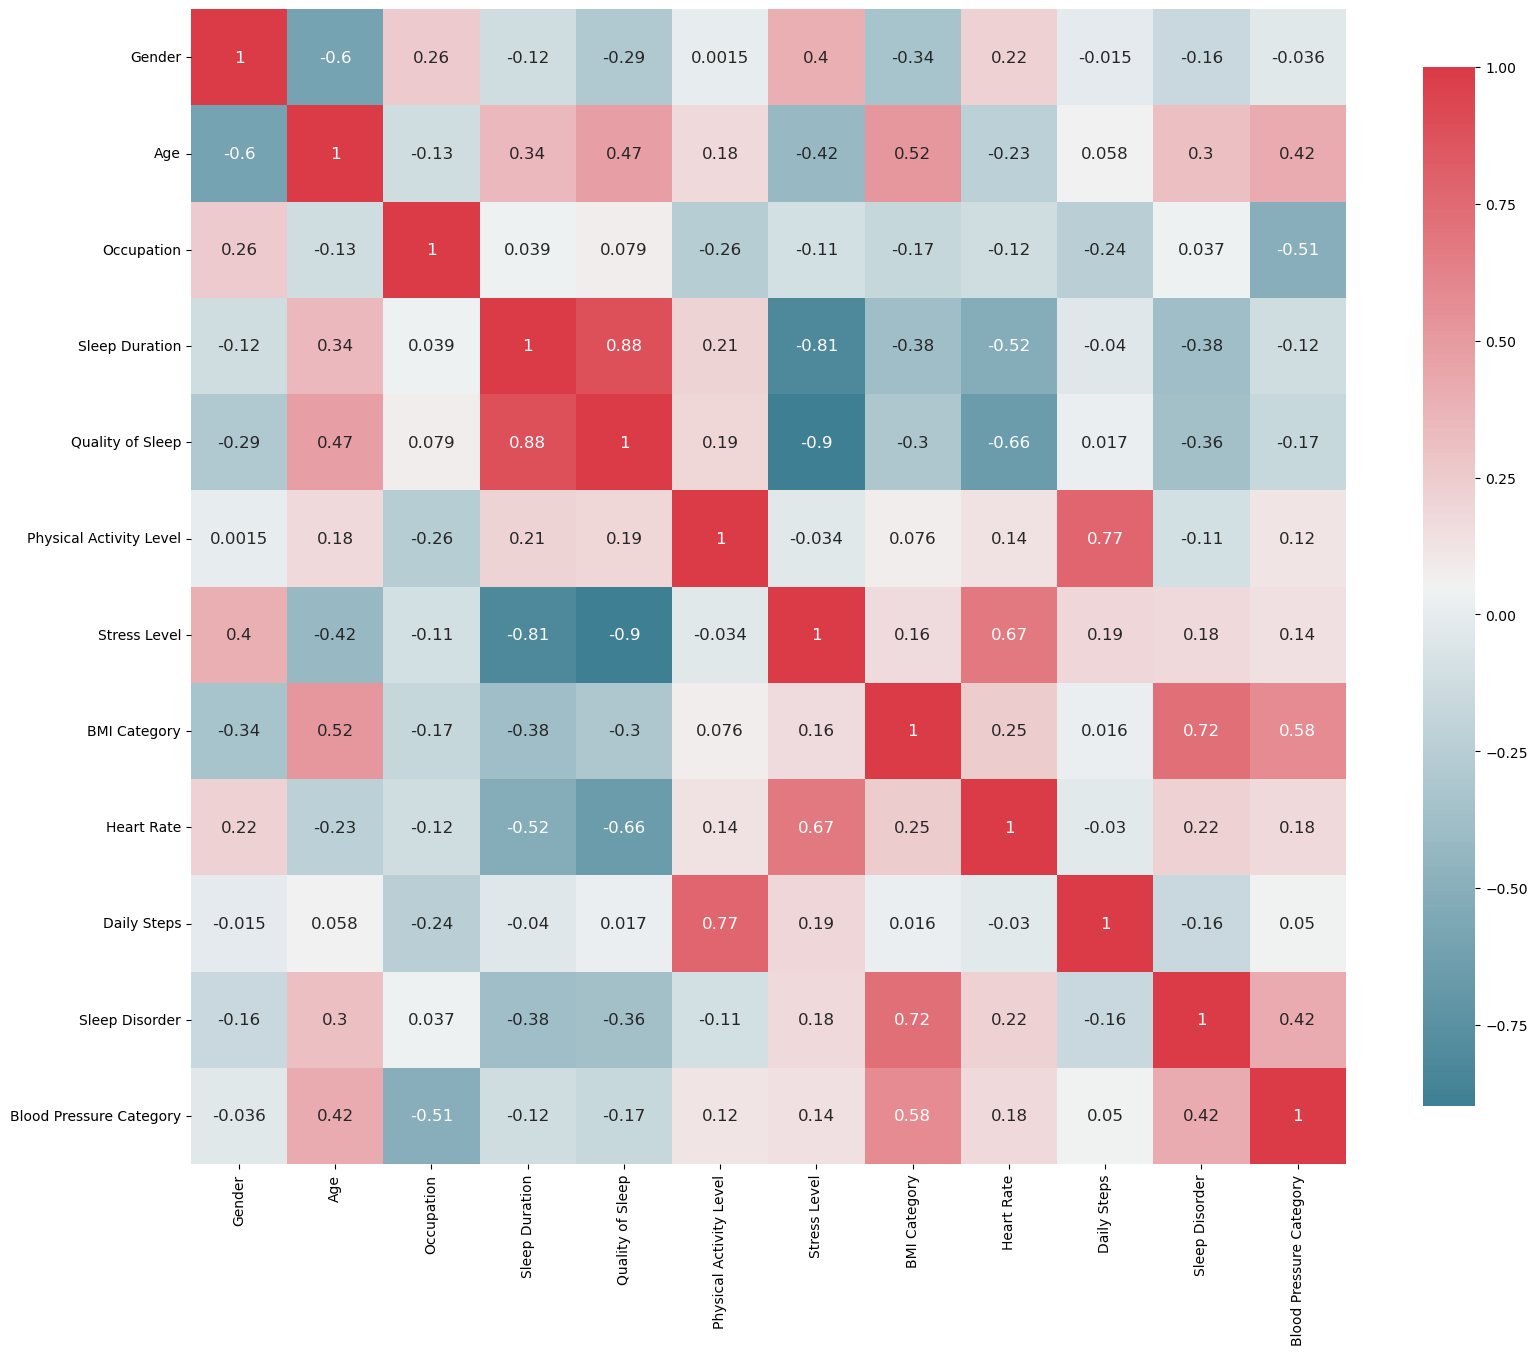

In [275]:
#correlation heatmap

def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots(figsize=( 20 , 15 ))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df1)

# Conclusion: We need to predict the sleep disorder. After our visualizations, we observed that 'Gender', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', and 'Daily Steps' are irrelevant to the result. Therefore, we will be working with the other features.

# Data Modelling

In [276]:
ff=df1.copy()
# Drop specified columns from the copied DataFrame
ff=ff.drop(['Sleep Disorder','Gender','Sleep Duration','Quality of Sleep','Daily Steps','Physical Activity Level'], axis=1)

In [277]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(ff, df["Sleep Disorder"], test_size=0.2, random_state=125)

# Initialize a Logistic Regression model
model= LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report :\n", classification_rep)

Accuracy: 0.84
Classification Report :
                       precision    recall  f1-score   support

            Insomnia       0.71      0.77      0.74        13
No disorder detected       0.87      0.91      0.89        45
         Sleep Apnea       0.86      0.71      0.77        17

            accuracy                           0.84        75
           macro avg       0.81      0.80      0.80        75
        weighted avg       0.84      0.84      0.84        75



C:\Users\linag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [278]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(ff, df['Sleep Disorder'], test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier model with 100 trees (estimators)
model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Obtain predicted probabilities for positive class (class 1)
y_scores = model.predict_proba(x_test)[:, 1]

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the model
print(f'Accuracy: {accuracy}')

Accuracy: 0.88


In [279]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 6  7  3]
 [ 7 29  7]
 [ 1 11  4]]


In [280]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(ff, df['Sleep Disorder'], test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the model
print(f'Accuracy: {accuracy}')

Accuracy: 0.88


In [281]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  7  3]
 [ 7 29  7]
 [ 1 11  4]]


In [282]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                       precision    recall  f1-score   support

            Insomnia       0.43      0.38      0.40        16
No disorder detected       0.62      0.67      0.64        43
         Sleep Apnea       0.29      0.25      0.27        16

            accuracy                           0.52        75
           macro avg       0.44      0.43      0.44        75
        weighted avg       0.51      0.52      0.51        75



In [283]:
# Initialize a RandomForestClassifier
model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params)

# Train the final model on the training data
final_model.fit(x_train, y_train)

RandomForestClassifier()

In [284]:
# Features (independent variables)
x = ff

# Target variable (dependent variable)
y = df['Sleep Disorder']

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier()

# Number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold for stratified sampling during cross-validation
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and obtain accuracy scores
accuracy_scores = cross_val_score(classifier, x, y, cv=stratified_kfold, scoring='accuracy')

# Print accuracy for each fold
for fold, accuracy in enumerate(accuracy_scores, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print(f'Mean Accuracy Across {num_folds} Folds = {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.9467
Fold 2: Accuracy = 0.9333
Fold 3: Accuracy = 0.8933
Fold 4: Accuracy = 0.8667
Fold 5: Accuracy = 0.9189
Mean Accuracy Across 5 Folds = 0.9118


In [285]:
# Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 6  7  3]
 [ 7 29  7]
 [ 1 11  4]]

Classification Report:
                      precision    recall  f1-score   support

            Insomnia       0.43      0.38      0.40        16
No disorder detected       0.62      0.67      0.64        43
         Sleep Apnea       0.29      0.25      0.27        16

            accuracy                           0.52        75
           macro avg       0.44      0.43      0.44        75
        weighted avg       0.51      0.52      0.51        75



In [286]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.918918918918919


In [287]:
import joblib

# Save the trained model to a file
joblib.dump(final_model, 'model_final.joblib')

['model_final.joblib']

In [288]:
import numpy as np
model = joblib.load(open('model_final.joblib', 'rb'))

# Example input data
input_data = np.array([54, 1, 5, 1, 80, 2]).reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data)

# Print the prediction
print(prediction)

['No disorder detected']


C:\Users\linag\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

